In [134]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [90]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [91]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_data()

In [92]:
train_set_x_orig.shape, test_set_x_orig.shape

((209, 64, 64, 3), (50, 64, 64, 3))

In [93]:
train_set_y.shape

(1, 209)

y = [0], it's a 'non-cat' picture.


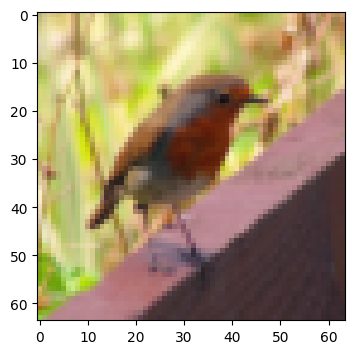

In [94]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


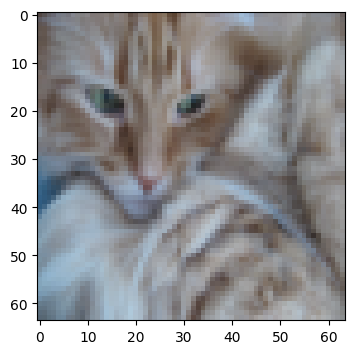

In [95]:
# Example of a picture
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [96]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [97]:
X_train = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T / 255.0
X_test = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255.0

X_train.shape, X_test.shape #(X_train shape (n, m))

((12288, 209), (12288, 50))

In [98]:
Y_train, Y_test = train_set_y, test_set_y
Y_train.shape, Y_test.shape

((1, 209), (1, 50))

In [99]:
# let's define a fn to initialize  parameters
# Note: the first element of the `layer_dims` is the input `X` dims

def initialize_parameters(layer_dims: list[int]):
    L = len(layer_dims)
    parameters = {}
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

params = initialize_parameters([4, 4, 2, 1])
params

{'W1': array([[ 0.01409395,  0.01350744, -0.00771032,  0.0013413 ],
        [ 0.00884684, -0.00455916,  0.00562512,  0.0112501 ],
        [-0.01066623, -0.00170974, -0.00356075, -0.01034741],
        [-0.01593361, -0.00654906,  0.00098279, -0.0061157 ]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.00405347, -0.01280805, -0.01466277, -0.01451185],
        [-0.00989858,  0.01741156,  0.00816543, -0.01179992]]),
 'b2': array([[0.],
        [0.]]),
 'W3': array([[0.00549687, 0.01241723]]),
 'b3': array([[0.]])}

In [100]:
Z = np.random.randn(10, 1)
np.maximum(0, Z)

array([[0.03639115],
       [0.31326546],
       [1.09846642],
       [0.        ],
       [1.4625942 ],
       [0.47687326],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.99000719]])

In [101]:
# let's define some of the activation functions

def sigmoid(Z):
    return 1. / (1. + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

In [102]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    """
    
    Z = np.dot(W, A) + b
    
    return Z


def linear_activation_forward(A_prev, W, b, activation, layer_num, forward_caches):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    layer_num -- the current layer number (used to assign keys like 'Z1', 'A1')
    forward_caches -- dictionary to store the forward caches
    """
    
    Z = linear_forward(A_prev, W, b)
    forward_caches['Z' + str(layer_num)] = Z  # Store Z in the cache dictionary
    
    if activation == "sigmoid":
        A = sigmoid(Z)
    elif activation == "relu":
        A = relu(Z)
    
    forward_caches['A' + str(layer_num)] = A  # Store A in the cache dictionary

    return A


def forward_propagation(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    forward_caches -- dictionary containing Z and A caches for each layer
    """

    forward_caches = {}  # Dictionary to store Z and A for each layer
    A = X
    L = len(parameters) // 2  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Store Z and A for each layer in the dictionary.
    for l in range(1, L):
        A = linear_activation_forward(A, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu", 
                                        layer_num=l, forward_caches=forward_caches)
    
    # Implement LINEAR -> SIGMOID. Store Z and A for the final layer in the dictionary.
    AL = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid", 
                                    layer_num=L, forward_caches=forward_caches)
    
    return AL, forward_caches


In [103]:
X = np.random.randn(4, 10) * 2.0
AL, forward_caches = forward_propagation(X, params)

In [104]:
# forward_caches

In [105]:
AL

array([[0.5       , 0.5       , 0.5       , 0.50000101, 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ]])

In [106]:
# let's define the cost function

def compute_cost(AL, Y):
    """
    Computes the cross-entropy cost for binary classification.

    Arguments:
    AL -- Probability vector corresponding to the predicted labels, shape (1, number of examples)
    Y -- True "label" vector (1, number of examples), containing 0 or 1

    Returns:
    cost -- Cross-entropy cost, a scalar value

    The cross-entropy cost is calculated as:
    cost = (-1 / m) * sum(Y * log(AL) + (1 - Y) * log(1 - AL))
    where:
    - AL is the predicted probability vector of the neural network
    - Y is the true label vector
    - m is the number of training examples
    """
    m = Y.shape[1]
    
    first_term = np.sum(Y * np.log(AL))
    second_term = np.sum((1-Y) * np.log(1-AL))
    
    cost = (-1./m) * (first_term + second_term)
    
    return cost

In [107]:
def relu_derivative(Z):
    """
    Derivative of the ReLU activation function.
    """
    dZ = np.where(Z > 0, 1, 0)
    return dZ


def sigmoid_derivative(Z):
    """
    Derivative of the Sigmoid activation function.
    """
    s = 1 / (1 + np.exp(-Z))
    return s * (1 - s)


def activation_derivative(Z, activation="relu"):
    """
    Returns the derivative of the activation function.
    """
    if activation == "relu":
        return relu_derivative(Z)
    elif activation == "sigmoid":
        return sigmoid_derivative(Z)

In [108]:
def compute_gradients(dZ, A_prev, m):
    """
    Implements the backward propagation for a single layer (layer l) for m examples.

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l), shape (n_l, m)
    A_prev -- Activations from the previous layer (or input data), shape (n_l-1, m)
    m -- number of training examples

    Returns:
    dW -- Gradient of the cost with respect to W (current layer l), shape (n_l, n_l-1)
    db -- Gradient of the cost with respect to b (current layer l), shape (n_l, 1)
    """
    dW = (1. / m) * np.dot(dZ, A_prev.T)  # Gradient w.r.t. weights
    db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)  # Gradient w.r.t. bias (average over all examples)

    return dW, db



def backward_propagation(X, Y, AL, forward_caches, parameters):
    """
    Implement the backward propagation for the entire network for m training examples.

    Arguments:
    AL -- Probability vector corresponding to label predictions, shape (1, m)
    Y -- True "label" vector (1, m)
    forward_caches -- Dictionary containing Z and A caches from forward propagation
    parameters -- Dictionary containing W and b parameters for each layer

    Returns:
    grads -- Dictionary containing gradients dW and db for each layer
    """
    
    grads = {}
    L = len(parameters) // 2  # number of layers
    m = Y.shape[1]  # number of examples
    
    # Initializing the backpropagation
    dZL = AL - Y  # For the output layer, dZL = A[L] - Y

    # Lth layer (SIGMOID -> LINEAR) gradients
    A_prev = forward_caches['A' + str(L-1)]
    grads["dW" + str(L)], grads["db" + str(L)] = compute_gradients(dZL, A_prev, m=m)

    # Loop over the layers backward, starting from L-1 to 1
    for l in reversed(range(1, L)):
        dZ = np.dot(parameters['W' + str(l+1)].T, dZL) * activation_derivative(forward_caches['Z' + str(l)], 
                                                                                activation="relu")
        A_prev = forward_caches['A' + str(l-1)] if l > 1 else X  # A_prev for layer 1 is input X
        
        grads["dW" + str(l)], grads["db" + str(l)] = compute_gradients(dZ, A_prev, m=m)
        dZL = dZ  # Update dZL for the next layer
    
    return grads

In [109]:
def update_parameters(parameters, gradients, lr=0.001):
    """
    Updates parameters for an L-layer neural network using gradient descent.

    Arguments:
    parameters -- Python dictionary containing the parameters "W1", "b1", ..., "WL", "bL"
    gradients -- Python dictionary containing the gradients "dW1", "db1", ..., "dWL", "dbL"
    lr -- Learning rate (default is 0.001)

    Returns:
    parameters -- Python dictionary containing the updated parameters
    """
    
    L = len(parameters) // 2  # number of layers in the neural network
    
    # Update rule for each parameter using gradient descent
    for l in range(1, L+1):
        parameters['W' + str(l)] = parameters['W' + str(l)] - (lr * gradients['dW' + str(l)])
        parameters['b' + str(l)] = parameters['b' + str(l)] - (lr * gradients['db' + str(l)])
        
    return parameters

In [110]:

def nn_model(layer_dims, X_train, Y_train, X_test, Y_test,
                num_iterations=10000, lr=0.001, print_cost=True):
    
    parameters = initialize_parameters(layer_dims)
    
    costs, test_costs = [], []
    # Loop (gradient descent)

    for i in range(num_iterations):
        # Forward propagation. 
        AL, forward_caches = forward_propagation(X=X_train, parameters=parameters)
        
        
        # Cost function
        cost = compute_cost(AL=AL, Y=Y_train)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        gradients = backward_propagation(X=X_train, 
                                    Y=Y_train,
                                    AL=AL,
                                    forward_caches=forward_caches,
                                    parameters=parameters)
        
        
        # inferences
        AL_test, _ = forward_propagation(X=X_test, parameters=parameters)
        cost_test = compute_cost(AL=AL_test, Y=Y_test)
        
        
        # Print the cost every 500 iterations
        if print_cost and (i % 500 == 0):
            print(f"Training cost at {i}th iteration is: {cost}")
            print(f"Test cost at {i}th iteration is: {cost_test}\n")
        
        
        # Gradient descent parameter update.
        parameters = update_parameters(parameters=parameters, 
                                    gradients=gradients, 
                                    lr=lr)
        
        costs.append(cost)
        test_costs.append(cost_test)

    return parameters, costs, test_costs

In [111]:
nx, ny = X_train.shape[0], Y_train.shape[0]
nx, ny

(12288, 1)

In [140]:
%%time

layer_dims = [nx, 8, 4, ny]
n_iterations = 5000

opt_params, costs, test_costs = nn_model(
    layer_dims=layer_dims,
    X_train=X_train,
    Y_train=Y_train,
    X_test=X_test,
    Y_test=Y_test,
    num_iterations=n_iterations,
    lr=0.05
)

Training cost at 0th iteration is: 0.6931442527777203
Test cost at 0th iteration is: 0.6931501215621622

Training cost at 500th iteration is: 0.6439712152169634
Test cost at 500th iteration is: 0.8463088720763718

Training cost at 1000th iteration is: 0.6439632550132391
Test cost at 1000th iteration is: 0.8469467058100216

Training cost at 1500th iteration is: 0.643894798293195
Test cost at 1500th iteration is: 0.8469448153241576

Training cost at 2000th iteration is: 0.6055701212962034
Test cost at 2000th iteration is: 0.8423854330916299

Training cost at 2500th iteration is: 0.37855800316724464
Test cost at 2500th iteration is: 0.696120105195415

Training cost at 3000th iteration is: 0.8076477504285352
Test cost at 3000th iteration is: 0.6421082541563533

Training cost at 3500th iteration is: 0.030014032476189487
Test cost at 3500th iteration is: 2.1182859594619634

Training cost at 4000th iteration is: 0.01766965344127381
Test cost at 4000th iteration is: 2.237930117679716

Training

In [113]:

def plot_cost_over_iterations(n_iterations, train_costs, test_costs):
    """
    Plots the training and test costs over iterations on the same plot.

    Arguments:
    n_iterations -- Number of iterations (epochs)
    train_costs -- List of training costs over iterations
    test_costs -- List of test costs over iterations
    """
    
    plt.figure(figsize=(6, 4))  # Set the figure size

    # Plot the training costs in blue
    plt.plot(range(n_iterations), train_costs, color='b', linewidth=2, label='Training Cost')

    # Plot the test costs in red
    plt.plot(range(n_iterations), test_costs, color='r', linewidth=2, label='Test Cost')

    # Customizing the plot
    plt.xlabel('Iterations', fontsize=10)
    plt.ylabel('Cost', fontsize=10)
    plt.title(f'Cost Function Over Iterations', fontsize=12)
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add a legend to differentiate between Training and Test cost
    plt.legend(loc='best', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

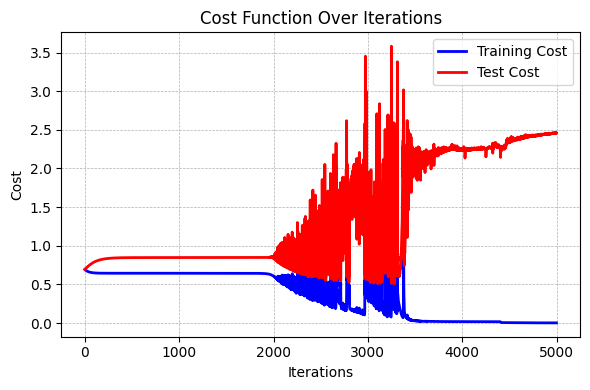

In [141]:
plot_cost_over_iterations(n_iterations=n_iterations, 
                            train_costs=costs, test_costs=test_costs)

In [142]:
opt_params

{'W1': array([[-0.01605664,  0.01061077, -0.03165927, ..., -0.00594537,
          0.02479617, -0.01870342],
        [-0.00985179,  0.01209161, -0.00393726, ...,  0.00675932,
         -0.00399498,  0.0113386 ],
        [ 0.02067922,  0.01436156,  0.0105259 , ...,  0.01894998,
          0.01718571,  0.0450796 ],
        ...,
        [-0.02776422,  0.01102517, -0.00907428, ...,  0.00314567,
          0.01644235, -0.03687577],
        [ 0.0081087 ,  0.01376607, -0.0085579 , ..., -0.0202107 ,
         -0.00448911, -0.01877675],
        [-0.02180709,  0.00481803,  0.00413845, ..., -0.00525215,
          0.00663001, -0.03479258]]),
 'b1': array([[ 0.03645178],
        [ 0.00037522],
        [-0.00687953],
        [-0.00593072],
        [-0.06580674],
        [ 0.09341125],
        [ 0.00268173],
        [ 0.03900982]]),
 'W2': array([[ 0.3956299 ,  0.02163462,  0.6773957 ,  0.54301383,  0.59301518,
          0.27849855,  0.00396398,  0.03071402],
        [ 0.13914831, -0.00423689, -0.78921321

In [136]:
def predict(X, Y, opt_params):
    """
    Predicts the labels for the input data X using the optimized parameters.

    Arguments:
    X -- Input data of shape (input_size, number of examples)
    Y -- True labels of shape (1, number of examples)
    opt_params -- Dictionary containing the optimized parameters "W1", "b1", ..., "WL", "bL"

    Returns:
    predictions -- Predictions for each example (0 or 1)
    accuracy -- Accuracy of the model's predictions, compared to the true labels
    """
    
    m = X.shape[1]  # number of examples
    L = len(opt_params) // 2  # number of layers in the neural network
    A = X
    
    # Forward propagation through all layers
    for l in range(1, L):
        Z = np.dot(opt_params['W' + str(l)], A) + opt_params['b' + str(l)]
        A = relu(Z)  # Use ReLU activation for hidden layers
    
    # Output layer (using sigmoid activation)
    ZL = np.dot(opt_params['W' + str(L)], A) + opt_params['b' + str(L)]
    AL = sigmoid(ZL)
    
    # Convert probabilities to binary predictions
    predictions = (AL > 0.5).astype(int)
    
    # Calculate the accuracy
    accuracy = np.mean(predictions == Y) * 100
    
    return predictions, accuracy


In [143]:
_, train_acc = predict(X_train, Y_train, opt_params)
print(f"Training accuracy: {train_acc}")

Training accuracy: 100.0


In [144]:
_, test_acc = predict(X_test, Y_test, opt_params)
print(f"Test accuracy: {test_acc}")

Test accuracy: 76.0
